In [49]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [50]:
def CropImg (image, cropped_height, cropped_width, cropped_y, cropped_x):
    height = image.shape[0]
    width = image.shape[1]
    cropped = image[cropped_y:cropped_y+cropped_height, cropped_x:cropped_x+cropped_width]
    return cropped

def FlipImg(img, direction):
    return cv2.flip(img, direction)

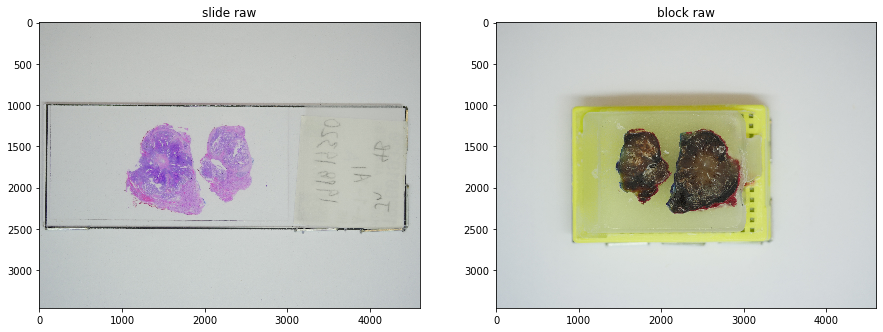

In [59]:
img_sld = cv2.cvtColor(cv2.imread('img/sld_1.JPG'), cv2.COLOR_BGR2RGB)
img_blk = cv2.cvtColor(cv2.imread('img/blk_1.JPG'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('slide raw')
plt.imshow(img_sld)

plt.subplot(122)
plt.title('block raw')
plt.imshow(img_blk)
plt.show()

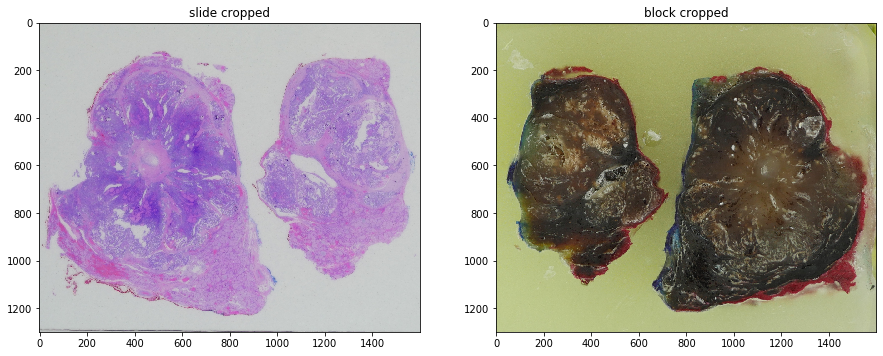

In [58]:
crop_img_sld = CropImg(img_sld, 1300, 1600, 1100, 1020)
crop_img_blk = CropImg(img_blk, 1300, 1600, 1100, 1400)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('slide cropped')
plt.imshow(crop_img_sld)

plt.subplot(122)
plt.title('block cropped')
plt.imshow(crop_img_blk)
plt.show()

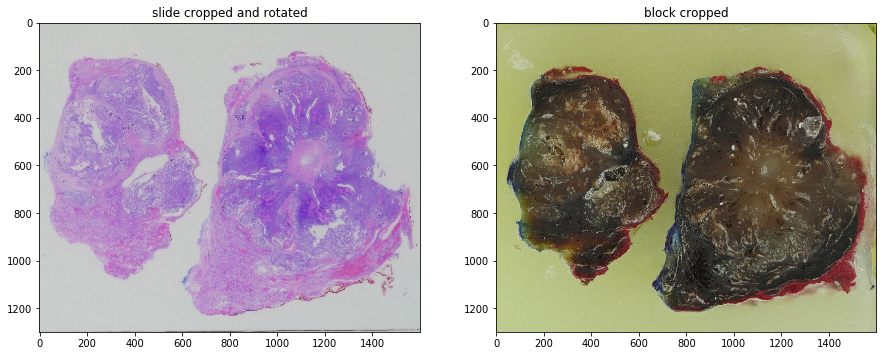

In [57]:
flip_img_sld = FlipImg(FlipImg(crop_img_sld, 0), -1)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('slide cropped and rotated')
plt.imshow(flip_img_sld)

plt.subplot(122)
plt.title('block cropped')
plt.imshow(crop_img_blk)
plt.show()

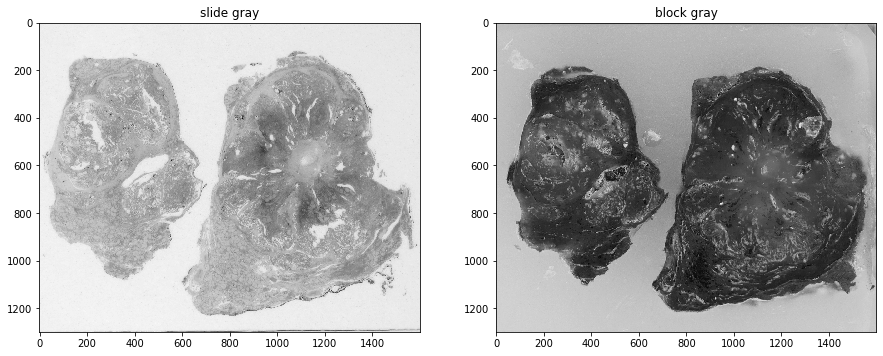

In [56]:
gray_sld = cv2.cvtColor(flip_img_sld,cv2.COLOR_RGB2GRAY)
edges_sld = cv2.Canny(gray_sld,50,50)

gray_blk = cv2.cvtColor(crop_img_blk,cv2.COLOR_RGB2GRAY)
edges_blk = cv2.Canny(gray_blk,50,50)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('slide gray')
plt.imshow(gray_sld, cmap='gray')

plt.subplot(122)
plt.title('block gray')
plt.imshow(gray_blk, cmap='gray')
plt.show()

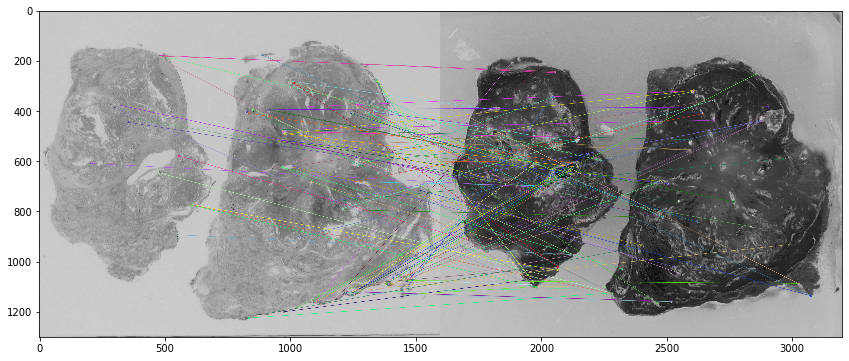

(<matplotlib.image.AxesImage at 0x7fd5dc623410>, None)

In [48]:
img1 = gray_sld
img2 = gray_blk

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1=img1,keypoints1=kp1,img2=img2,keypoints2=kp2, matches1to2=matches, outImg=img2, flags=2)

plt.figure(figsize = (40,6))
plt.imshow(img3, interpolation='nearest'), plt.show()

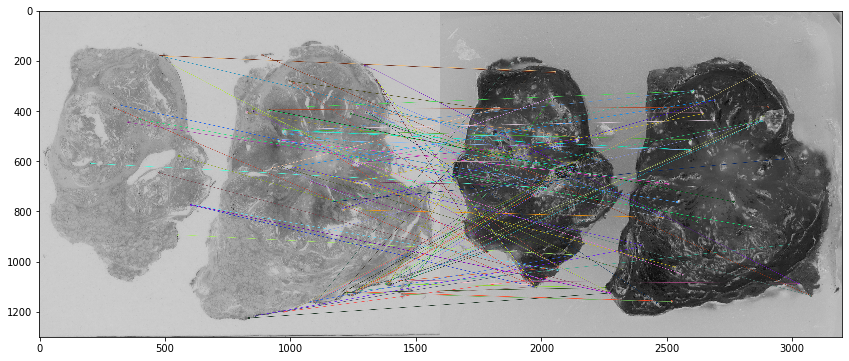

(<matplotlib.image.AxesImage at 0x7fd5e298c9d0>, None)

In [34]:
img1 = gray_sld
img2 = gray_blk


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)

matches = bf.knnMatch(des1,des2,k=1)

img3 = cv2.drawMatchesKnn(img1=img1,keypoints1=kp1,img2=img2,keypoints2=kp2, matches1to2=matches, outImg=img2, flags=2)
plt.figure(figsize = (40,6))
plt.imshow(img3),plt.show()